In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from lsst.sims.catalogs.generation.db import CatalogDBObject
from lsst.sims.catalogs.generation.db import CatalogDBObject

In [3]:
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catUtils.baseCatalogModels import GalaxyTileObj
from lsst.sims.catalogs.measures.instance import InstanceCatalog
from lsst.sims.utils import ObservationMetaData



Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values


In [4]:
from lsst.sims.catUtils.baseCatalogModels import SNObj
from lsst.sims.catUtils.mixins import FrozenSNCat

In [5]:
s  = SNObj()

In [6]:
names = s.get_column_names()

/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geopoint'
  return fn(*arg, **kw)
/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geocenter'
  return fn(*arg, **kw)
/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geobox'
  return fn(*arg, **kw)


In [7]:
for key in names:
    if 'snra' in names[key]:
        print key

TwinkSN


In [8]:
print names['TwinkSN']

['galtileid', 'htmid', 'snid', 't0', 'c', 'x1', 'x0', 'redshift', 'snra', 'sndec', 'cx', 'cy', 'cz']


In [9]:
class SNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'snid', 'galtileid','t0', 'x0', 'x1', 'c', 'redshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}
                        #'x0':'%8e', 'x1':'%8e', 'c':'%8e', 't0':'%8e'}
        
class TSNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'snid', 'Tgaltileid','Tt0', 'Tx0', 'Tx1', 'Tc', 'Tredshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}



In [10]:
degConv = np.array([1., 1./60., 1./3600.])
raConv = degConv / 24.0 * 360.
centralRA = np.dot(np.array([3., 32., 30]), raConv) #03h 32m 30s
centralDec = np.dot(np.array([-28, 6., 0.]), degConv)
patchRadius = 0.4 * np.sqrt(2) #np.dot(np.array([0.0, 10.0, 0.]), degConv)

In [11]:
opsimPath = os.path.join('/Users/rbiswas/data/LSST/OpSimData')
opsimDB = os.path.join(opsimPath,'enigma_1189_sqlite.db')

In [12]:
from lsst.sims.catUtils.utils import ObservationMetaDataGenerator

In [13]:
generator = ObservationMetaDataGenerator(driver='sqlite', database=opsimDB) #database = opsimPath, driver='sqlite')
obsMetaDataResults = generator.getObservationMetaData(limit=100,
                                                      fieldRA=(centralRA - 2.0, centralRA + 2.0), 
                                                      fieldDec=(centralDec - 2.0, centralDec + 2.0),
                                                      expMJD=(49500., 49690.),
                                                      boundLength=0.05,
                                                      boundType='circle')

In [14]:
len(obsMetaDataResults)

100

In [15]:
TwinklesObsMetaDataSmall = ObservationMetaData(boundType='circle',pointingRA=centralRA,pointingDec=centralDec,
                                          boundLength=0.05, mjd=60703.0, bandpassName='r', m5=23.)

In [16]:
obsMetaDataResults[35].mjd.TAI

49612.338296000002

In [17]:
TwinklesObsMetaDataSmall = obsMetaDataResults[35]

In [18]:
obsMetaDataResults[35].mjd.TAI

49612.338296000002

In [19]:
TwinklesObsMetaDataSmall.bandpass

'r'

In [20]:
#tsmall = SNCopy(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall)

In [21]:
#tsmall.write_catalog('TwinklesSN.dat')

In [22]:
#!wc -l TwinklesSN.dat

In [23]:
#!head TwinklesSN.dat

In [24]:
Ttsmall = TSNCopy(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall)

In [25]:
Ttsmall.write_catalog('TTwinklesSN.dat')

In [26]:
!head TTwinklesSN.dat

#raJ2000, decJ2000, snid, Tgaltileid, Tt0, Tx0, Tx1, Tc, Tredshift
9.248688e-01, -4.796652e-01, 6000005211701, 60000052117.0000, 1458.2762, 0.0000, 0.2415, -0.0370, 0.7080
9.249165e-01, -4.796917e-01, 6000035145300, 60000351453.0000, 3497.6771, 0.0000, 0.0199, 0.0572, 0.8491
9.249172e-01, -4.796932e-01, 6000035145315, 60000351453.0000, 11.8677, 0.0000, -0.3470, -0.0993, 0.8491
9.249169e-01, -4.796976e-01, 6000035145310, 60000351453.0000, 3156.4636, 0.0000, -0.7167, -0.1043, 0.8491
9.249148e-01, -4.796984e-01, 6000035145308, 60000351453.0000, 1377.2543, 0.0000, -0.6872, 0.0519, 0.8491
9.249178e-01, -4.796950e-01, 6000035145306, 60000351453.0000, 1573.3868, 0.0000, 1.5237, 0.0223, 0.8491
9.249177e-01, -4.796949e-01, 6000035145307, 60000351453.0000, 2323.1161, 0.0000, -1.1637, 0.0758, 0.8491
9.249170e-01, -4.796959e-01, 6000035145313, 60000351453.0000, 1172.0783, 0.0000, -1.8897, -0.0017, 0.8491
9.249164e-01, -4.796930e-01, 6000035145302, 60000351453.0000, 3627.8847, 0.0000, -0.5255, 0.12

In [27]:
import pandas as pd
TTSNdf = pd.read_csv('TTwinklesSN.dat', sep=',\s+')

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


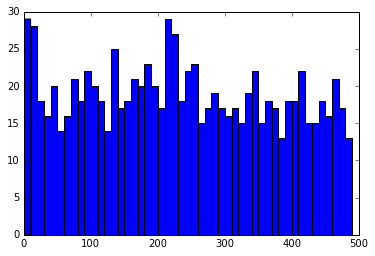

In [28]:
_ = plt.hist(TTSNdf.Tt0, np.arange(0., 500., 10.))

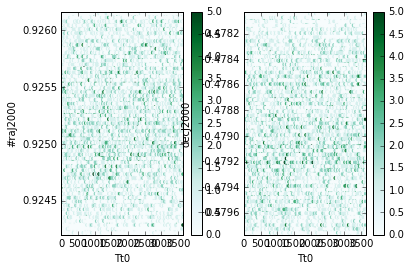

In [29]:
fig, corr_ax = plt.subplots(1, 2)
TTSNdf.plot.hexbin(x='Tt0', y='#raJ2000', ax=corr_ax[0])
#corr_ax[0].plot(centralRA, centralDec, 'ks')
TTSNdf.plot.hexbin(x='Tt0', y='decJ2000', ax=corr_ax[1])

In [30]:
TwinklesObsMetaDataSmall.pointingRA

53.009138473031555

In [31]:
import matplotlib.patches  as mpatches

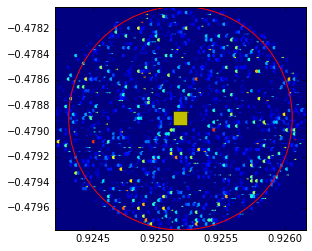

In [32]:
fig, ax = plt.subplots()
ax.hexbin(TTSNdf['#raJ2000'], TTSNdf.decJ2000)
ax.plot(np.radians(TwinklesObsMetaDataSmall.pointingRA), np.radians(TwinklesObsMetaDataSmall.pointingDec), 
         'ys', markersize=14)
circ = mpatches.Circle((np.radians(TwinklesObsMetaDataSmall.pointingRA), np.radians(TwinklesObsMetaDataSmall.pointingDec)), 
         np.radians(0.05))
circ.set(edgecolor='r', fill=False)
#circ.set(face)
ax.add_artist(circ)
ax.set_aspect('equal')

In [33]:
sncatalog = FrozenSNCat(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, 
                         column_outputs=['snra', 'sndec', 'snid', 'x0', 't0', 'flux', 'flux_err', 'mag', 'mag_err',
                                         'TmagNorm', 'TsedFilepath', 'adu'])
sncatalog.surveyStartDate = 49500.
sncatalog.writeSedFile = False
sncatalog.prefix = '/Users/rbiswas/tmp/'

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)


In [34]:
sncatalog.suppressDimSN = True

In [35]:
_ = sncatalog.write_catalog('newcat.dat', chunk_size=2000)

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1886)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1884)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 1892)
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 665)


In [36]:
!wc -l newcat.dat

     393 newcat.dat


In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('newcat.dat', sep=',\s+')
df.rename(columns={'#snid':'snid'}, inplace=True)
df['snid'] = df.snid.astype(int)
df.set_index('snid', inplace=True)

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [39]:
sncatalog.mjdobs

49612.338296000002

In [40]:
df['DeltaT'] = sncatalog.mjdobs - df['t0']
df['SNR'] = df.flux / df.flux_err
df.head()

,snra,sndec,z,t0,c,x1,x0,flux,flux_err,mag,mag_err,TmagNorm,TsedFilepath,adu,DeltaT,SNR
snid,,,,,,,,,,,,,,,,
6000134534807,0.924901,-0.479660,0.8308,49634.4989,-0.004487,0.4750,0.000003,3.573111e-11,3.602404e-11,26.1174,0.757033,51.2035,specFile_6000134534807_49612.3383_r.dat,103.4990,-22.160604,0.991868
6000134534803,0.924900,-0.479660,0.8308,49622.7228,0.142884,-1.3618,0.000002,4.205507e-11,3.603722e-11,25.9405,0.671993,26.3066,specFile_6000134534803_49612.3383_r.dat,121.8171,-10.384504,1.166990
6000166844111,0.924963,-0.479732,0.8669,49575.7365,-0.003971,-0.7924,0.000003,1.391120e-11,3.597856e-11,27.1416,1.386626,27.1689,specFile_6000166844111_49612.3383_r.dat,40.2953,36.601796,0.386652
6000202198804,0.925073,-0.479665,0.8573,49583.0608,0.055133,-0.5496,0.000002,1.411514e-11,3.597898e-11,27.1258,1.375263,26.8265,specFile_6000202198804_49612.3383_r.dat,40.8860,29.277496,0.392316
6001080913807,0.925130,-0.479707,0.7744,49531.5629,0.152381,1.8306,0.000003,5.325459e-12,3.596064e-11,28.1841,2.223623,26.9168,specFile_6001080913807_49612.3383_r.dat,15.4258,80.775396,0.148091


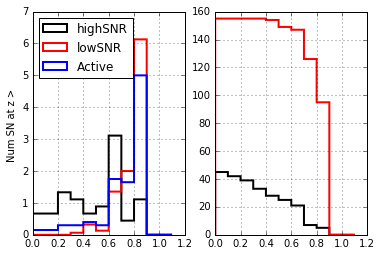

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2);
_ = ax[0].hist(df.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=True,
               label='highSNR')
_ = ax[0].hist(df.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
             normed=True, label='lowSNR')
_ = ax[0].hist(df.query('SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='b', 
             normed=True, label='Active')
ax[0].grid(True)
_ = ax[1].hist(df.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=False, 
               cumulative=-1)
_ = ax[1].hist(df.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
               normed=False, cumulative=-1)
_ = ax[1].grid(True)
_ = ax[0].legend(loc='upper left')
_ = ax[0].set_ylabel('PDF')
_ = ax[0].set_ylabel('Num SN at z > ')

In [42]:
from lsst.sims.catUtils.exampleCatalogDefinitions.phoSimCatalogExamples import PhoSimCatalogSN

In [43]:
pc = PhoSimCatalogSN(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, column_outputs=['EBV'])
pc.writeSedFile = True
pc.surveyStartDate = 49500
pc.suppressDimSN = True

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)
('Type of return', <type 'numpy.ndarray'>, dtype('O'))
()


In [44]:
from copy import deepcopy

In [45]:
pc.column_outputs

['prefix',
 'uniqueId',
 'raPhoSim',
 'decPhoSim',
 'phoSimMagNorm',
 'sedFilepath',
 'redshift',
 'shear1',
 'shear2',
 'kappa',
 'raOffset',
 'decOffset',
 'spatialmodel',
 'galacticExtinctionModel',
 'galacticAv',
 'galacticRv',
 'internalExtinctionModel']

In [46]:
pc.write_catalog('SNPhoSimCatalog.dat')

('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 0)
('Type of return', <type 'numpy.ndarray'>, dtype('O'))
()
('badvalues ', nan)
('mjd ', 49612.338296000002)
('maxTime', 100.0)
('number of cases ', 6327)
('writing file to ', 'specFile_6000274614100_49612.3383_r.dat')
('writing file to ', 'specFile_6000606050501_49612.3383_r.dat')
('writing file to ', 'specFile_6000018451007_49612.3383_r.dat')
('writing file to ', 'specFile_6000091709107_49612.3383_r.dat')
('writing file to ', 'specFile_6000777478400_49612.3383_r.dat')
('writing file to ', 'specFile_6000972229700_49612.3383_r.dat')
('writing file to ', 'specFile_6000167058301_49612.3383_r.dat')
('writing file to ', 'specFile_6000134534807_49612.3383_r.dat')
('writing file to ', 'specFile_6000134534803_49612.3383_r.dat')
('writing file to ', 'specFile_6000166844111_49612.3383_r.dat')
('writing file to ', 'specFile_6000202198804_49612.3383_r.dat')
('writing file to ', 'specFile_6000307465100_49612.

In [47]:
np.array([3.2, 1.2]) *1.2

array([ 3.84,  1.44])

In [48]:
0.1/11.113

0.008998470260055791

In [49]:
!wc -l SNPhoSimCatalog.dat

     410 SNPhoSimCatalog.dat


In [50]:
!head -22 SNPhoSimCatalog.dat

Opsim_obshistid 203482
SIM_SEED 22406828
Unrefracted_RA 53.0091385
Unrefracted_Dec -27.4389488
Opsim_moonra 324.684411
Opsim_moondec -8.00760085
Opsim_rotskypos 113.221044
Opsim_filter 2
Opsim_rawseeing 0.453714
Opsim_sunalt -33.7055601
Opsim_moonalt 10.4061741
Opsim_dist2moon 84.8430173
Opsim_moonphase 93.375972
Opsim_expmjd 49612.3383
Opsim_altitude 83.9812315
Opsim_azimuth 69.825106
exptime 30
airmass 1.005543
object 6144281204838442 52.9401293 -27.4936232 27.0441473 specFile_6000274614100_49612.3383_r.dat 0.8928 0 0 0 0 0 point CCM 0.0280091519 3.1 none 0.00903521028
object 6144620595713066 52.9403475 -27.4941089 50.2928282 specFile_6000606050501_49612.3383_r.dat 0.6129 0 0 0 0 0 point CCM 0.0279902752 3.1 none 0.00902912105
object 6144018893831210 52.9428164 -27.4915307 45.9638829 specFile_6000018451007_49612.3383_r.dat 0.0792 0 0 0 0 0 point CCM 0.0277443552 3.1 none 0.008949792
object 6144093910125610 52.9380811 -27.4896773 27.2686583 specFile_6000091709107_49612.3383_r.dat 0.87

In [51]:
phdf = pd.read_csv('SNPhoSimCatalog.dat', skiprows=18, sep='\s*')

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [52]:
phdf.rename(columns={})

,object,6144281204838442,52.9401293,-27.4936232,27.0441473,specFile_6000274614100_49612.3383_r.dat,0.8928,0,0.1,0.2,0.3,0.4,point,CCM,0.0280091519,3.1,none,0.00903521028
0,object,6144620595713066,52.940347,-27.494109,50.292828,specFile_6000606050501_49612.3383_r.dat,0.6129,0,0,0,0,0,point,CCM,0.027990,3.1,none,0.009029
1,object,6144018893831210,52.942816,-27.491531,45.963883,specFile_6000018451007_49612.3383_r.dat,0.0792,0,0,0,0,0,point,CCM,0.027744,3.1,none,0.008950
2,object,6144093910125610,52.938081,-27.489677,27.268658,specFile_6000091709107_49612.3383_r.dat,0.8797,0,0,0,0,0,point,CCM,0.026835,3.1,none,0.008656
3,object,6144796137881642,52.937181,-27.490848,48.395589,specFile_6000777478400_49612.3383_r.dat,0.5110,0,0,0,0,0,point,CCM,0.026950,3.1,none,0.008694
4,object,6144995563212842,52.945861,-27.484301,23.658330,specFile_6000972229700_49612.3383_r.dat,0.6213,0,0,0,0,0,point,CCM,0.026790,3.1,none,0.008642
5,object,6144171067700266,52.943822,-27.487632,27.133079,specFile_6000167058301_49612.3383_r.dat,0.8490,0,0,0,0,0,point,CCM,0.027830,3.1,none,0.008977
6,object,6144137763642410,52.942826,-27.496588,51.203527,specFile_6000134534807_49612.3383_r.dat,0.8308,0,0,0,0,0,point,CCM,0.027895,3.1,none,0.008998
7,object,6144137763638314,52.942802,-27.496564,26.306595,specFile_6000134534803_49612.3383_r.dat,0.8308,0,0,0,0,0,point,CCM,0.027895,3.1,none,0.008999
8,object,6144170848369706,52.946380,-27.500688,27.168879,specFile_6000166844111_49612.3383_r.dat,0.8669,0,0,0,0,0,point,CCM,0.027726,3.1,none,0.008944
9,object,6144207051575338,52.952664,-27.496868,26.826461,specFile_6000202198804_49612.3383_r.dat,0.8573,0,0,0,0,0,point,CCM,0.027579,3.1,none,0.008897


In [53]:
phdf.head()

,object,6144281204838442,52.9401293,-27.4936232,27.0441473,specFile_6000274614100_49612.3383_r.dat,0.8928,0,0.1,0.2,0.3,0.4,point,CCM,0.0280091519,3.1,none,0.00903521028
0,object,6144620595713066,52.940347,-27.494109,50.292828,specFile_6000606050501_49612.3383_r.dat,0.6129,0,0,0,0,0,point,CCM,0.027990,3.1,none,0.009029
1,object,6144018893831210,52.942816,-27.491531,45.963883,specFile_6000018451007_49612.3383_r.dat,0.0792,0,0,0,0,0,point,CCM,0.027744,3.1,none,0.008950
2,object,6144093910125610,52.938081,-27.489677,27.268658,specFile_6000091709107_49612.3383_r.dat,0.8797,0,0,0,0,0,point,CCM,0.026835,3.1,none,0.008656
3,object,6144796137881642,52.937181,-27.490848,48.395589,specFile_6000777478400_49612.3383_r.dat,0.5110,0,0,0,0,0,point,CCM,0.026950,3.1,none,0.008694
4,object,6144995563212842,52.945861,-27.484301,23.658330,specFile_6000972229700_49612.3383_r.dat,0.6213,0,0,0,0,0,point,CCM,0.026790,3.1,none,0.008642


(array([ 85.,  51.,  51.,  39.,  47.,  34.,  39.,  19.,  11.,  15.]),
 array([  6.14400019e+15,   6.14417208e+15,   6.14434397e+15,
          6.14451585e+15,   6.14468774e+15,   6.14485962e+15,
          6.14503151e+15,   6.14520339e+15,   6.14537528e+15,
          6.14554716e+15,   6.14571905e+15]),
 <a list of 10 Patch objects>)

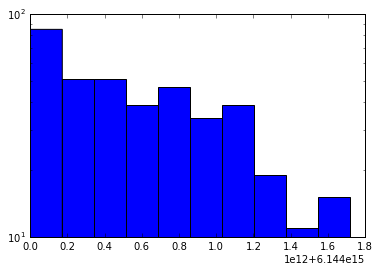

In [54]:
plt.hist(np.asarray(phdf)[:,1], log=True)

In [ ]:
def phosimOutDF(fname)

In [56]:
phosimOuta = pd.read_csv('/Users/rbiswas/soft/phosim_release/output/centroid_lsst_e_203482_R22_S11_E000.txt', sep='\s+')

In [57]:
phosimOutb = pd.read_csv('/Users/rbiswas/soft/phosim_release/output/centroid_lsst_e_203482_R22_S11_E001.txt', sep='\s+')

In [58]:
phosimOuta.Photons = phosimOuta.Photons + phosimOutb.Photons

In [59]:
phosimOuta['SourceID'] = phosimOuta.SourceID.astype(int)

In [60]:
phosimOuta['snid'] = np.right_shift(phosimOuta['SourceID'], 10)

In [61]:
phosimOuta.set_index('snid', inplace=True)

In [90]:
df.adu.min()

-31.282399999999999

In [62]:
df['ratio'] = df.adu / phosimOuta.Photons

In [92]:
df['Photons'] = phosimOuta.Photons

In [93]:
df.query('ratio == 0.')

,snra,sndec,z,t0,c,x1,x0,flux,flux_err,mag,mag_err,TmagNorm,TsedFilepath,adu,DeltaT,SNR,ratio,Photons
snid,,,,,,,,,,,,,,,,,,
6000567535901,0.925230,-0.479718,0.5854,49525.7148,-0.080818,0.8492,0.000010,0,NaN,inf,inf,25.7696,specFile_6000567535901_49612.3383_r.dat,0,86.623496,NaN,0,186
6000051869210,0.924735,-0.479604,0.8944,49515.4154,-0.011652,-0.2010,0.000003,0,NaN,inf,inf,27.2143,specFile_6000051869210_49612.3383_r.dat,0,96.922896,NaN,0,21
6000307465100,0.924783,-0.479480,0.2032,49533.6499,0.116885,1.5579,0.000065,0,NaN,inf,inf,23.5162,specFile_6000307465100_49612.3383_r.dat,0,78.688396,NaN,0,4249
6000154757310,0.925900,-0.478503,0.0882,49546.0542,0.008071,-0.0848,0.000534,0,NaN,inf,inf,21.4969,specFile_6000154757310_49612.3383_r.dat,0,66.284096,NaN,0,29439
6000235329700,0.924566,-0.479269,0.5866,49523.9657,0.080372,-2.1333,0.000004,0,NaN,inf,inf,27.1608,specFile_6000235329700_49612.3383_r.dat,0,88.372596,NaN,0,38
6000663799100,0.925614,-0.478287,0.5207,49515.1218,0.152756,-0.8747,0.000008,0,NaN,inf,inf,26.0598,specFile_6000663799100_49612.3383_r.dat,0,97.216496,NaN,0,168
6000288586302,0.925701,-0.478240,0.8013,49516.9954,0.021236,0.4631,0.000003,0,NaN,inf,inf,26.8955,specFile_6000288586302_49612.3383_r.dat,0,95.342896,NaN,0,33
6000927990401,0.924920,-0.479333,0.8021,49521.5369,0.002458,-0.0298,0.000003,0,NaN,inf,inf,27.1715,specFile_6000927990401_49612.3383_r.dat,0,90.801396,NaN,0,25
6000678379206,0.924583,-0.479389,0.8187,49513.5910,0.084870,-0.1880,0.000002,0,NaN,inf,inf,27.4710,specFile_6000678379206_49612.3383_r.dat,0,98.747296,NaN,0,15


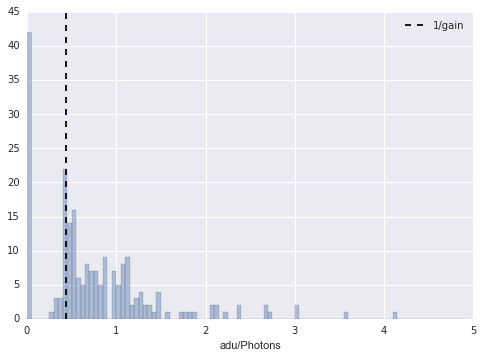

In [130]:
fig, ax = plt.subplots()
sns.distplot(df.ratio.replace([-np.inf, np.inf],np.nan).dropna(), bins=np.arange(0.0, 5., 0.05), 
             rug_kws=False,kde=False, norm_hist=False).set_xlim(0,)
#ax.hist(df.ratio.replace([-np.inf, np.inf],np.nan).dropna() ,bins=np.arange(0., 5, 0.05))
ax.axvline(1./2.3, color='k', **{'label':'1/gain', 'linestyle':'dashed'})
ax.set_xlabel('adu/Photons')
ax.legend(loc='best')

In [140]:
fig.savefig('invGain.png')

In [82]:
import seaborn as sns
sns.set()

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.


In [163]:
print len(df.query('ratio > 10000')), df.query('ratio > 10000').ratio.unique()
print len(df.query('ratio < -10000')), df.query('ratio < -10000').ratio.unique()

26 [ inf]
18 [-inf]


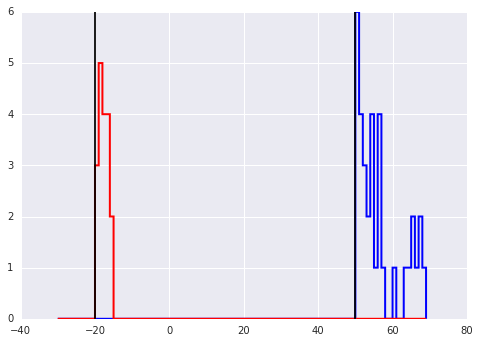

In [156]:
_df = df.query('ratio == 0.')
_dff = df.query('ratio < 0.')
_ = plt.hist(_df.DeltaT / (_df.z + 1.), bins=np.arange(-30, 70., 1.), histtype='step', color='b', alpha=1., lw=2.)
_ = plt.hist(_dff.DeltaT / (_dff.z + 1.), bins=np.arange(-30, 70., 1.), histtype='step', color='r', alpha=1., lw=2.)
plt.axvline(-20., color='k')
plt.axvline(50., color='k')

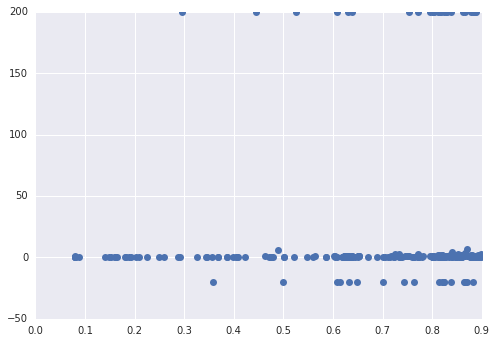

In [139]:
_df = df[['z', 'ratio']].replace([-np.inf, np.inf], [-20., 200.]).dropna()
#sns.jointplot(_df.z, _df.ratio, kind='kde')
plt.plot(_df.z, _df.ratio, 'o')

In [ ]:
adus = df.adu.dropna().sum()
photons = phosimOuta.replace([np.inf],np.nan).Photons.dropna().sum()

In [ ]:
photons / adus

In [131]:
active = df.query('SNR > 0.').replace([np.inf],np.nan).dropna().ratio
bright = df.query('SNR > 5.').replace([np.inf],np.nan).dropna().ratio

(0, 5)

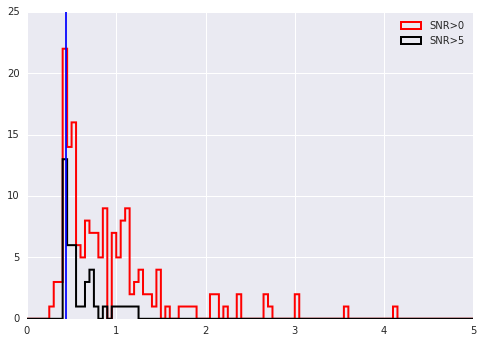

In [135]:
s = 0.05
plt.hist(active, color='r', bins=np.arange(0., 25, s), histtype='step', label='SNR>0', lw=2)
plt.hist(bright, color='k', bins=np.arange(0., 25, s), histtype='step', label='SNR>5', lw=2)
plt.legend(loc='best')
plt.axvline(1./2.3)
plt.xlim(0, 5)

In [ ]:
import lsst.afw.image as afwi

In [ ]:
img0 = afwi.ImageF('/Users/rbiswas/soft/phosim_release/output/lsst_e_203482_f2_R22_S11_E000.fits.gz')
img1 = afwi.ImageF('/Users/rbiswas/soft/phosim_release/output/lsst_e_203482_f2_R22_S11_E001.fits.gz')

In [ ]:
arr0 = img0.getArray()
arr1 = img1.getArray()

In [ ]:
arr = arr0 + arr1
electrons = arr.sum()

In [ ]:
adus  = df.adu.dropna().sum()

In [ ]:
2.3 / np.sqrt(2)

In [ ]:
electrons / adus

In [ ]:
x.replace([-np.inf, np.inf], np.nan, inplace=True)

In [ ]:
x.dropna().hist()

In [ ]:
df.set_index('snid', inplace=True)

In [ ]:
x.dropna()

In [ ]:
df.index.size

In [ ]:
phosimOuta.index.dtype

In [ ]:
6145532174336041 in df.index.values

In [ ]:
df.iat[6145532174336041]

In [ ]:
phosimOuta['snid']  = phosimOuta.index.values

In [ ]:
phosimOuta['snid'] = np.right_shift(phosimOuta['snid'], 10)

In [ ]:
phosimOuta.set_index('snid', inplace=True)

In [ ]:
phosimOuta['adu']/ phosimOuta['Photons']

In [ ]:
phosimOuta.head()

In [ ]:
df.index.min()

In [ ]:
phosimOuta.index.min()

In [ ]:
np.left_shift(6000000189404,10) < phosimOuta.index.min()

In [ ]:
np.right_shift(np.left_shift(6000000189404,10),10)

In [ ]:
id(None)

In [ ]:
x  = None

In [ ]:
id(x)

In [ ]:
y = None

In [ ]:
xx =3

In [ ]:
yy  = 3

In [ ]:
 == y

In [ ]:
x is y

In [ ]:
id(xx)

In [ ]:
id(yy)